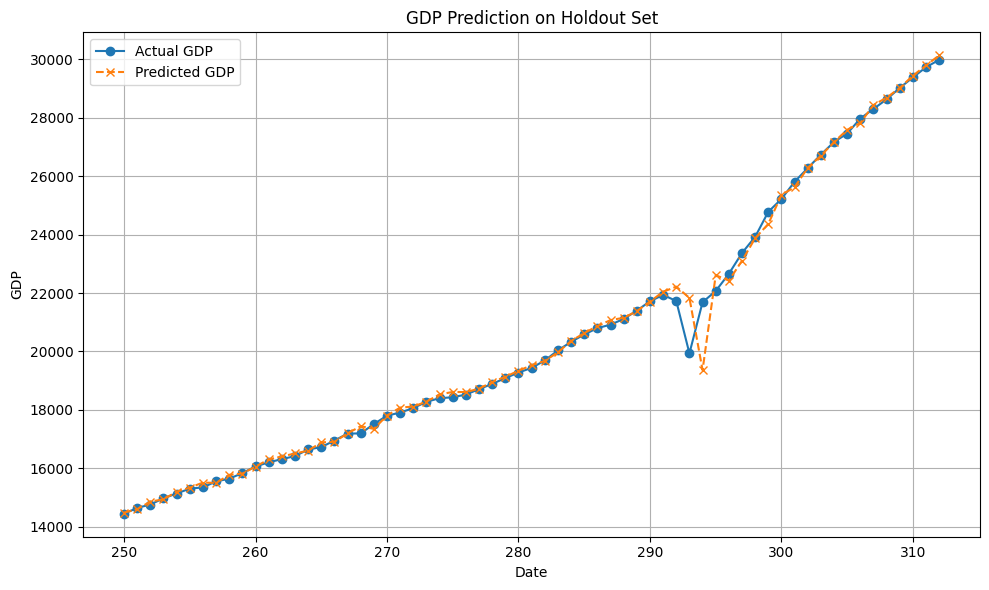

(0, np.float64(1.427253447402947))
(1, np.float64(-0.41859804560356656))
9557.431876812998


In [51]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Set working directory and read data
os.chdir("/home/jpell/Downloads")
df = pd.read_csv("GDP.csv")

# Ensure datetime index if applicable
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Insert NUMBER of LAGS:
num_lags = 3

# Create all lag features
for i in range(1, num_lags):
    df[f"GDP_lag{i}"] = df["GDP"].shift(i)

# Drop NA rows introduced by lagging
df.dropna(inplace=True)

# Define features and target
X = df[[f"GDP_lag{i}" for i in range(1,num_lags)]]
y = df["GDP"]

# Split into train/validation/test (e.g., 60/20/20)
X_temp, X_holdout, y_temp, y_holdout = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=False)  # 0.25 of 0.8 = 0.2

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation and holdout sets
y_val_pred = model.predict(X_val)
y_holdout_pred = model.predict(X_holdout)


# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_holdout.index, y_holdout, label="Actual GDP", marker='o')
plt.plot(y_holdout.index, y_holdout_pred, label="Predicted GDP", linestyle='--', marker='x')
plt.title("GDP Prediction on Holdout Set")
plt.xlabel("Date")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

for i in enumerate(model.coef_):
    print(i)

print(np.sqrt(
    sum([(i-j)**2 for i, j in zip(y_holdout, y_val_pred)
    ]) / len(y_holdout)
    )
    )

In [29]:
df1 = pd.read_csv("shot.csv")

df1[[
    "DATETIME"
    , "LATITUDE"
]].groupby("DATETIME").count()

/tmp/ipykernel_343982/3891259021.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("shot.csv")


,LATITUDE
DATETIME,
2014/01/01 05:00:02+00,1
2014/01/01 05:00:06+00,1
2014/01/01 05:00:07+00,1
2014/01/01 05:00:10+00,2
2014/01/01 05:00:11+00,1
...,...
2025/01/01 04:16:00+00,2
2025/01/01 04:17:00+00,2
2025/01/01 04:29:00+00,1
